## Import Libraries

In [1]:
import spacy
import pickle
import random
import doc
from spacy import displacy
#!pip install spacy
import warnings
warnings.filterwarnings("ignore")
import glob
import docx
import glob
import warnings
warnings.filterwarnings("ignore")
from spacy import displacy
import docx
from spacy import schemas
from spacy import Dict
from spacy.lang.en.stop_words import  STOP_WORDS
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import textract
#import antiword
from PyPDF2 import PdfFileReader
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from spacy.matcher import Matcher

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nlp = spacy.load("en_core_web_sm")
import nltk
from spacy.matcher import Matcher

## Import Data
## For Sql developer resumes

In [2]:
path='C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\SQL Developer Lightning insight'
all_files=glob.glob(path + "/*.docx")
all_files

['C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\SQL Developer Lightning insight\\Anil kumar.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\SQL Developer Lightning insight\\AradhanaTripathi[4_0].docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\SQL Developer Lightning insight\\Buddha Vamsi.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\SQL Developer Lightning insight\\kamballapradeep.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\SQL Developer Lightning insight\\Neeraj Mishra.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\SQL Developer Lightning insight\\premsai.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\SQL Developer Lightning insight\\PSyamKumar[2_3].docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\SQL Developer Lightning insight\\Rajupavanakumari[2_10].docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\SQL Developer Lig

In [3]:
def readtxt(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [4]:

li=[]
for filename in all_files:
    dummy_1=readtxt(filename)
    li.append(dummy_1)
    

In [5]:
import pandas as pd

In [6]:
dataframe=pd.DataFrame()

In [7]:
for files in all_files:
    print(files)
    dataframe["cv"]=li

C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\SQL Developer Lightning insight\Anil kumar.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\SQL Developer Lightning insight\AradhanaTripathi[4_0].docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\SQL Developer Lightning insight\Buddha Vamsi.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\SQL Developer Lightning insight\kamballapradeep.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\SQL Developer Lightning insight\Neeraj Mishra.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\SQL Developer Lightning insight\premsai.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\SQL Developer Lightning insight\PSyamKumar[2_3].docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\SQL Developer Lightning insight\Rajupavanakumari[2_10].docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\SQL Developer Lightning insight\Ramalakshmi K.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\

In [8]:
dataframe

cv
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...
2   BUDDHA VAMSI                                  ...
3   KAMBALLA PRADEEP                              ...
4    \n                                        Res...
5   SQL DEVELOPER\nName: -   Bandi prem sai\n\n\nW...
6                                          SQL SER...
7    RAJU PAVANA KUMARI\n\n\nProfessional Summary:...
8                                       resume\n\n...
9   Name: Ramesh\n\nCareer Objective: \n          ...
10  B. vinod kumar\n\nOBJECTIVE:\nWilling to work ...

In [9]:
label_list=[]
for i in range (len(all_files)):
    label="SQLDeveloper"
    label_list.append(label)
    

In [10]:
dataframe["label"]=label_list

In [11]:
dataframe

cv         label
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...  SQLDeveloper
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...  SQLDeveloper
2   BUDDHA VAMSI                                  ...  SQLDeveloper
3   KAMBALLA PRADEEP                              ...  SQLDeveloper
4    \n                                        Res...  SQLDeveloper
5   SQL DEVELOPER\nName: -   Bandi prem sai\n\n\nW...  SQLDeveloper
6                                          SQL SER...  SQLDeveloper
7    RAJU PAVANA KUMARI\n\n\nProfessional Summary:...  SQLDeveloper
8                                       resume\n\n...  SQLDeveloper
9   Name: Ramesh\n\nCareer Objective: \n          ...  SQLDeveloper
10  B. vinod kumar\n\nOBJECTIVE:\nWilling to work ...  SQLDeveloper

## For workday resumes

In [12]:
path1='C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\workday resumes'
all_files1=glob.glob(path1 + "/*.docx")
all_files1

['C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\workday resumes\\ChinnaSubbarayuduM_Hexaware.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\workday resumes\\Gopi Krishna_Hexaware.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\workday resumes\\Himaja G_(Hexaware).docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\workday resumes\\Jyotiverma_Heaware.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\workday resumes\\MooraboyinaGuravaiah_Hexaware.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\workday resumes\\P V Sai Krishna_ Hexaware.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\workday resumes\\RahulM_Hexaware.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\workday resumes\\RameshP_Hexaware.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\workday resumes\\Srikanth-Hexaware.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_20

In [13]:
li1=[]
for filename1 in all_files1:
    dummy_11=readtxt(filename1)
    li1.append(dummy_11)

In [14]:
dataframe1=pd.DataFrame()

In [15]:
for files in all_files1:
    print(files)
    dataframe1["cv"]=li1

C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\workday resumes\ChinnaSubbarayuduM_Hexaware.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\workday resumes\Gopi Krishna_Hexaware.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\workday resumes\Himaja G_(Hexaware).docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\workday resumes\Jyotiverma_Heaware.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\workday resumes\MooraboyinaGuravaiah_Hexaware.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\workday resumes\P V Sai Krishna_ Hexaware.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\workday resumes\RahulM_Hexaware.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\workday resumes\RameshP_Hexaware.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\workday resumes\Srikanth-Hexaware.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\workday resumes\SSKumar_Hexaware.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Re

In [16]:
label_list1=[]
for i in range (len(all_files1)):
    label1="workdayResumes"
    label_list1.append(label1)
    

In [17]:
dataframe1["label"]=label_list1

In [18]:
dataframe1

cv           label
0   Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...  workdayResumes
1   \t\n\n\nName         : Gopi Krishna Reddy\n\t\...  workdayResumes
2                                         \n      ...  workdayResumes
3   \n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...  workdayResumes
4   \n\nMooraboyina Guravaiah\nWorkday Integration...  workdayResumes
5   VENKATA SAIKRISHNA\n Workday Consultant\n\n\nP...  workdayResumes
6   Rahul  (Techno Functional Consultant)  \nProfe...  workdayResumes
7   Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  workdayResumes
8   Seeking suitable positions in Workday HCM  as ...  workdayResumes
9   \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...  workdayResumes
10                                                ...  workdayResumes

## For peoplesoft resumes

In [19]:
path2='C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\Peoplesoft resumes'
all_files2=glob.glob(path2 + "/*.docx")
all_files2

['C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\Peoplesoft resumes\\Peoplesoft Admin_AnubhavSingh.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\Peoplesoft resumes\\Peoplesoft Admin_Murali.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\Peoplesoft resumes\\Peoplesoft Admin_SirazuddinMohammad.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\Peoplesoft resumes\\Peoplesoft Admin_Varkala Vikas.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\Peoplesoft resumes\\PeopleSoft DBA_Vivekanand Sayana.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\Peoplesoft resumes\\Peoplesoft FSCM_HariNarayana.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\Peoplesoft resumes\\Peoplesoft FSCM_Murali.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\Peoplesoft resumes\\Peoplesoft FSCM_PriyabrataHota.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\Peoples

In [20]:
li2=[]
for filename2 in all_files2:
    dummy_12=readtxt(filename2)
    li2.append(dummy_12)

In [21]:
dataframe2=pd.DataFrame()

In [22]:
for files in all_files2:
    print(files)
    dataframe2["cv"]=li2

C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\Peoplesoft resumes\Peoplesoft Admin_AnubhavSingh.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\Peoplesoft resumes\Peoplesoft Admin_Murali.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\Peoplesoft resumes\Peoplesoft Admin_SirazuddinMohammad.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\Peoplesoft resumes\Peoplesoft Admin_Varkala Vikas.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\Peoplesoft resumes\PeopleSoft DBA_Vivekanand Sayana.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\Peoplesoft resumes\Peoplesoft FSCM_HariNarayana.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\Peoplesoft resumes\Peoplesoft FSCM_Murali.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\Peoplesoft resumes\Peoplesoft FSCM_PriyabrataHota.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\Peoplesoft resumes\Peoplesoft FSCM_SUJATHA.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\R

In [23]:
label_list2=[]
for i in range (len(all_files2)):
    label2="Peoplesoft"
    label_list2.append(label2)
    

In [24]:
dataframe2["label"]=label_list2

In [25]:
dataframe2

cv       label
0    Anubhav Kumar Singh\t\t\n\n  To work in a gl...  Peoplesoft
1  Murali\n\nExperience Summary \n\nI have 6 year...  Peoplesoft
2  \n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\...  Peoplesoft
3   PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...  Peoplesoft
4  PeopleSoft Administration\n \nVivekanand Sayan...  Peoplesoft
5  \nHaving 4.6 years of experience in PeopleSoft...  Peoplesoft
6  \nHaving 4.6 years of experience in PeopleSoft...  Peoplesoft
7   \n\nCAREER OBJECTIVE\t\t\n\nPursuing Peopleso...  Peoplesoft
8  Tanna Sujatha \n\n\n\nOBJECTIVE\nSeeking a cha...  Peoplesoft
9  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nC O N ...  Peoplesoft

## For React resumes

In [26]:
path3='C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes'
all_files3=glob.glob(path3 + "/*.docx")
all_files3

['C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\React Developer_Deepakreddy.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\React Developer_Haripriya.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\React Developer_Kamalakar Reddy.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\React Developer_Naveen sadhu.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\React Developer_Pragnya.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\React Developer_Sarala Madasu-converted.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\React Developer_Thirupathiamma.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\React Dev_Krishna Kanth.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\React Dev_Krishna Kanth_Musquare Technologies.docx',
 'C:\\EXCELR CLASSROOM\\DATA_SCIENCE\\PROJECT_207\\Resumes\\React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.d

In [27]:
li3=[]
for filename3 in all_files3:
    dummy_13=readtxt(filename3)
    li3.append(dummy_13)
   

In [28]:
dataframe3=pd.DataFrame()

In [29]:
for files in all_files3:
    print(files)
    dataframe3["cv"]=li3


C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\React Developer_Deepakreddy.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\React Developer_Haripriya.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\React Developer_Kamalakar Reddy.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\React Developer_Naveen sadhu.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\React Developer_Pragnya.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\React Developer_Sarala Madasu-converted.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\React Developer_Thirupathiamma.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\React Dev_Krishna Kanth.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\React Dev_Krishna Kanth_Musquare Technologies.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx
C:\EXCELR CLASSROOM\DATA_SCIENCE\PROJECT_207\Resumes\React JS Developer_Venkatalaksh

In [30]:
label_list3=[]
for i in range (len(all_files3)):
    label3="ReactDeveloper"
    label_list3.append(label3)
    

In [31]:
dataframe3["label"]=label_list3

In [32]:
dataframe3

cv           label
0   Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...  ReactDeveloper
1   HARIPRIYA BATTINA \nExperience as UI Developer...  ReactDeveloper
2   KAMALAKAR REDDY. A \nLinked In: https://www.li...  ReactDeveloper
3   \nNaveen Sadhu\n\n\nTitle: software developer\...  ReactDeveloper
4    \nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...  ReactDeveloper
5   \n\n 204,Sri geethika prestige,road number 10...  ReactDeveloper
6   \n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...  ReactDeveloper
7   \nUi-Developer/ React JS Developer \nNAME: KRI...  ReactDeveloper
8   \nUi-Developer/ React JS Developer \nNAME: KRI...  ReactDeveloper
9   Kotani Durga Prasad\n\n\nObjective:\n\nAspiran...  ReactDeveloper
10  Venkatalakshmi Pedireddy\nSoftware Developer\n...  ReactDeveloper
11  KAMBALA SAI SURENDRA   \n \n\tMandepeta \t \n ...  ReactDeveloper
12  MAREEDU LOKESH BABU\nPROFESSIONAL OVERVIEW\n  ...  ReactDeveloper
13  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  ReactDeveloper
14  MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n     \n...  ReactDeveloper
15  \nPranish Sonone\n\t\n\n\n\n\nCareer summary:\...  ReactDeveloper
16  Ranga Gaganam  \n \n \nHaving 1+ years of succ...  ReactDeveloper
17  SHAIK ABDUL SHARUK   \n2 years’ Experience in ...  ReactDeveloper

## Final dataframe

In [33]:
final=pd.concat([dataframe,dataframe1,dataframe2,dataframe3],axis=0)
final=final.reset_index()
final=final.drop(columns='index',axis=0)
final


cv           label
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...    SQLDeveloper
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...    SQLDeveloper
2   BUDDHA VAMSI                                  ...    SQLDeveloper
3   KAMBALLA PRADEEP                              ...    SQLDeveloper
4    \n                                        Res...    SQLDeveloper
5   SQL DEVELOPER\nName: -   Bandi prem sai\n\n\nW...    SQLDeveloper
6                                          SQL SER...    SQLDeveloper
7    RAJU PAVANA KUMARI\n\n\nProfessional Summary:...    SQLDeveloper
8                                       resume\n\n...    SQLDeveloper
9   Name: Ramesh\n\nCareer Objective: \n          ...    SQLDeveloper
10  B. vinod kumar\n\nOBJECTIVE:\nWilling to work ...    SQLDeveloper
11  Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...  workdayResumes
12  \t\n\n\nName         : Gopi Krishna Reddy\n\t\...  workdayResumes
13                                        \n      ...  workdayResumes
14  \n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...  workdayResumes
15  \n\nMooraboyina Guravaiah\nWorkday Integration...  workdayResumes
16  VENKATA SAIKRISHNA\n Workday Consultant\n\n\nP...  workdayResumes
17  Rahul  (Techno Functional Consultant)  \nProfe...  workdayResumes
18  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  workdayResumes
19  Seeking suitable positions in Workday HCM  as ...  workdayResumes
20  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...  workdayResumes
21                                                ...  workdayResumes
22    Anubhav Kumar Singh\t\t\n\n  To work in a gl...      Peoplesoft
23  Murali\n\nExperience Summary \n\nI have 6 year...      Peoplesoft
24  \n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\...      Peoplesoft
25   PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...      Peoplesoft
26  PeopleSoft Administration\n \nVivekanand Sayan...      Peoplesoft
27  \nHaving 4.6 years of experience in PeopleSoft...      Peoplesoft
28  \nHaving 4.6 years of experience in PeopleSoft...      Peoplesoft
29   \n\nCAREER OBJECTIVE\t\t\n\nPursuing Peopleso...      Peoplesoft
30  Tanna Sujatha \n\n\n\nOBJECTIVE\nSeeking a cha...      Peoplesoft
31  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nC O N ...      Peoplesoft
32  Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...  ReactDeveloper
33  HARIPRIYA BATTINA \nExperience as UI Developer...  ReactDeveloper
34  KAMALAKAR REDDY. A \nLinked In: https://www.li...  ReactDeveloper
35  \nNaveen Sadhu\n\n\nTitle: software developer\...  ReactDeveloper
36   \nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...  ReactDeveloper
37  \n\n 204,Sri geethika prestige,road number 10...  ReactDeveloper
38  \n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...  ReactDeveloper
39  \nUi-Developer/ React JS Developer \nNAME: KRI...  ReactDeveloper
40  \nUi-Developer/ React JS Developer \nNAME: KRI...  ReactDeveloper
41  Kotani Durga Prasad\n\n\nObjective:\n\nAspiran...  ReactDeveloper
42  Venkatalakshmi Pedireddy\nSoftware Developer\n...  ReactDeveloper
43  KAMBALA SAI SURENDRA   \n \n\tMandepeta \t \n ...  ReactDeveloper
44  MAREEDU LOKESH BABU\nPROFESSIONAL OVERVIEW\n  ...  ReactDeveloper
45  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  ReactDeveloper
46  MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n     \n...  ReactDeveloper
47  \nPranish Sonone\n\t\n\n\n\n\nCareer summary:\...  ReactDeveloper
48  Ranga Gaganam  \n \n \nHaving 1+ years of succ...  ReactDeveloper
49  SHAIK ABDUL SHARUK   \n2 years’ Experience in ...  ReactDeveloper

## Different Categories

In [34]:
final.label.value_counts()

ReactDeveloper    18
SQLDeveloper      11
workdayResumes    11
Peoplesoft        10
Name: label, dtype: int64

In [35]:
print ("Displaying the distinct categories of resume -")
print (final.label.unique())

Displaying the distinct categories of resume -
['SQLDeveloper' 'workdayResumes' 'Peoplesoft' 'ReactDeveloper']


In [36]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (final.label
       .value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
ReactDeveloper    18
SQLDeveloper      11
workdayResumes    11
Peoplesoft        10
Name: label, dtype: int64


## Bar Plot

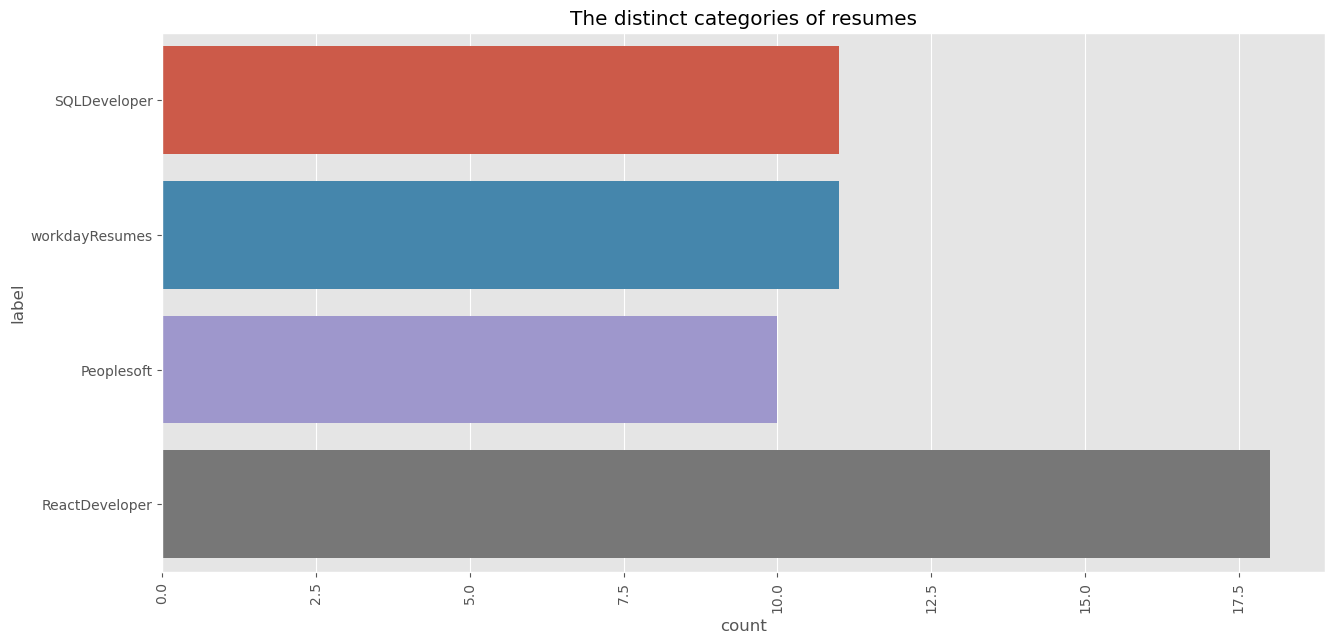

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.title("The distinct categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="label", data=final,color=None)
plt.show()

In [38]:
import numpy as np

## Pie Plot

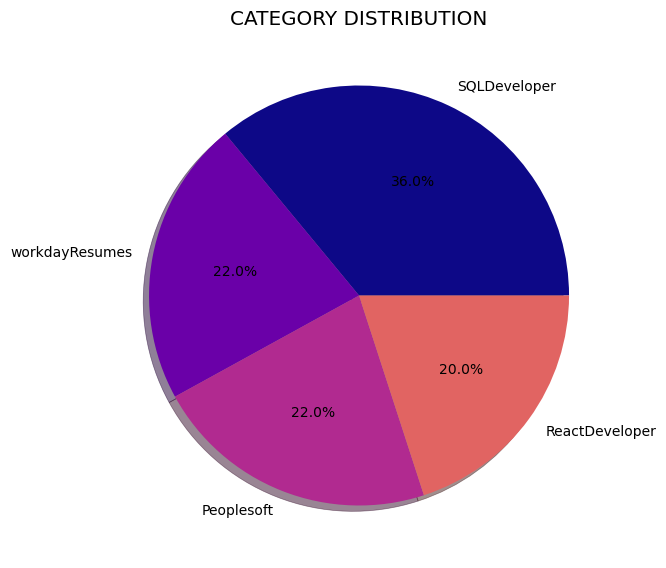

In [39]:
from matplotlib.gridspec import GridSpec
targetCounts = final.label.value_counts()
targetLabels  = final.label.unique()
# Make square figures and axes
plt.figure(1, figsize=(15,15))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [40]:
import plotly.express as px

In [41]:
px.pie(data_frame=final,names="label",values=None,hover_name=None,
    hover_data=None,hole=0.05,)

In [42]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

## Exploratory Data Analysis
### Text PreProcessing

In [43]:
stopwords=list(STOP_WORDS)
stopwords

['whereupon',
 "'ve",
 'part',
 'rather',
 'indeed',
 'whole',
 'becomes',
 'being',
 'empty',
 'across',
 'all',
 'why',
 'six',
 'eleven',
 'or',
 'also',
 'hereupon',
 'something',
 'somewhere',
 'last',
 'nowhere',
 'already',
 'less',
 'during',
 'someone',
 'throughout',
 'anyone',
 'many',
 'full',
 'below',
 'more',
 'its',
 '’s',
 'hers',
 'along',
 'twenty',
 'whether',
 'such',
 'almost',
 'hence',
 'often',
 'sometime',
 'whatever',
 'former',
 '‘s',
 'onto',
 'wherein',
 'she',
 'beside',
 'yours',
 'yourself',
 'put',
 'noone',
 'were',
 'until',
 'quite',
 'first',
 'would',
 'though',
 'herself',
 'am',
 'under',
 'everywhere',
 'several',
 'up',
 'now',
 'seem',
 'behind',
 'together',
 'ten',
 'everything',
 'whoever',
 'say',
 'show',
 'three',
 'whereby',
 'thence',
 'are',
 'done',
 '‘m',
 'somehow',
 'although',
 'n‘t',
 'via',
 'them',
 '‘ll',
 'nothing',
 'my',
 'neither',
 'move',
 'anywhere',
 'when',
 'before',
 'i',
 'thereupon',
 'meanwhile',
 'beyond',
 'h

In [44]:
punct = string.punctuation
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## Cleaning Resume Text

## Segmentation and Lemmatisation and Normalisation
### Create a Function

In [45]:
clean = []
lz = WordNetLemmatizer()
for i in range(final.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        final["cv"].iloc[i],
    )
    review = re.sub(r"[0-9]+", " ", review) # Remove Numbers
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [ lz.lemmatize(word) for word in review if word not in STOP_WORDS]
    review = " ".join(review)
    clean.append(review)

In [46]:
final["Clean_Resume"] = clean

In [47]:
final

cv           label  \
0   ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Develop...    SQLDeveloper   
1   \nAradhana Tripathi\n\nCurrent Location: Gachi...    SQLDeveloper   
2   BUDDHA VAMSI                                  ...    SQLDeveloper   
3   KAMBALLA PRADEEP                              ...    SQLDeveloper   
4    \n                                        Res...    SQLDeveloper   
5   SQL DEVELOPER\nName: -   Bandi prem sai\n\n\nW...    SQLDeveloper   
6                                          SQL SER...    SQLDeveloper   
7    RAJU PAVANA KUMARI\n\n\nProfessional Summary:...    SQLDeveloper   
8                                       resume\n\n...    SQLDeveloper   
9   Name: Ramesh\n\nCareer Objective: \n          ...    SQLDeveloper   
10  B. vinod kumar\n\nOBJECTIVE:\nWilling to work ...    SQLDeveloper   
11  Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...  workdayResumes   
12  \t\n\n\nName         : Gopi Krishna Reddy\n\t\...  workdayResumes   
13                                        \n      ...  workdayResumes   
14  \n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...  workdayResumes   
15  \n\nMooraboyina Guravaiah\nWorkday Integration...  workdayResumes   
16  VENKATA SAIKRISHNA\n Workday Consultant\n\n\nP...  workdayResumes   
17  Rahul  (Techno Functional Consultant)  \nProfe...  workdayResumes   
18  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...  workdayResumes   
19  Seeking suitable positions in Workday HCM  as ...  workdayResumes   
20  \nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...  workdayResumes   
21                                                ...  workdayResumes   
22    Anubhav Kumar Singh\t\t\n\n  To work in a gl...      Peoplesoft   
23  Murali\n\nExperience Summary \n\nI have 6 year...      Peoplesoft   
24  \n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\...      Peoplesoft   
25   PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...      Peoplesoft   
26  PeopleSoft Administration\n \nVivekanand Sayan...      Peoplesoft   
27  \nHaving 4.6 years of experience in PeopleSoft...      Peoplesoft   
28  \nHaving 4.6 years of experience in PeopleSoft...      Peoplesoft   
29   \n\nCAREER OBJECTIVE\t\t\n\nPursuing Peopleso...      Peoplesoft   
30  Tanna Sujatha \n\n\n\nOBJECTIVE\nSeeking a cha...      Peoplesoft   
31  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nC O N ...      Peoplesoft   
32  Kanumuru Deepak Reddy\n\n\n\nCAREER OBJECTIVE:...  ReactDeveloper   
33  HARIPRIYA BATTINA \nExperience as UI Developer...  ReactDeveloper   
34  KAMALAKAR REDDY. A \nLinked In: https://www.li...  ReactDeveloper   
35  \nNaveen Sadhu\n\n\nTitle: software developer\...  ReactDeveloper   
36   \nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...  ReactDeveloper   
37  \n\n 204,Sri geethika prestige,road number 10...  ReactDeveloper   
38  \n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...  ReactDeveloper   
39  \nUi-Developer/ React JS Developer \nNAME: KRI...  ReactDeveloper   
40  \nUi-Developer/ React JS Developer \nNAME: KRI...  ReactDeveloper   
41  Kotani Durga Prasad\n\n\nObjective:\n\nAspiran...  ReactDeveloper   
42  Venkatalakshmi Pedireddy\nSoftware Developer\n...  ReactDeveloper   
43  KAMBALA SAI SURENDRA   \n \n\tMandepeta \t \n ...  ReactDeveloper   
44  MAREEDU LOKESH BABU\nPROFESSIONAL OVERVIEW\n  ...  ReactDeveloper   
45  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  ReactDeveloper   
46  MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n     \n...  ReactDeveloper   
47  \nPranish Sonone\n\t\n\n\n\n\nCareer summary:\...  ReactDeveloper   
48  Ranga Gaganam  \n \n \nHaving 1+ years of succ...  ReactDeveloper   
49  SHAIK ABDUL SHARUK   \n2 years’ Experience in ...  ReactDeveloper   

                                         Clean_Resume  
0   anil kumar maddukuri sql msbi developer summar...  
1   aradhana tripathi current location gachibowli ...  
2   buddha vamsi career objective year experience ...  
3   kamballa pradeep synopsis looking forward aspi...  
4   resume neeraj mishra having year month expe

In [48]:
final["Clean_Resume"][0]

'anil kumar maddukuri sql msbi developer summary year experience m sql server ssms creating ssis package ssrs report microsoft business intelligence msbi tool expertise type join sub query writing complex query involving multiple table handled data manipulation data consistency creating view trigger synonym hand experience creation optimization debugging stored procedure function familiar writing query cte temporary table table variable good experience set operator like union union intersect assist required data experience manipulate data multiple table report client aggregate function window function string function worked extensively data extraction transformation loading etl process sql server integration service container loop container sequence container load data multiple source file database table expertise task like data flow task execute sql task control flow task execute package task execute process task bulk insert task sends mail task ftp task script task control flow level

## NER (Name Entity Recognition) Using Inbuilt Function of Spacy

In [49]:
nlp = spacy.load("en_core_web_sm")

In [50]:
text=nlp(final["Clean_Resume"][1])

In [51]:
displacy.render(text, style = "ent")

In [52]:
for ent in text.ents:
  print(f'{ent.label_.upper():{20}} - {ent.text}')

PERSON               - aradhana tripathi current
DATE                 - year
ORG                  - sql sa
ORG                  - athena
ORG                  - sql server management
PERSON               - jigyasa analytics
PERSON               - jun mar
ORG                  - athena
ORG                  - sa athena
PERSON               - sa athena
PERSON               - bangalore jun jul
ORG                  - credx risk analytics
ORG                  - cgpa
ORG                  - mca


## Creating WordCloud

In [53]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub(r"[0-9]+", " ", resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

[('experience', 311), ('server', 252), ('report', 238), ('application', 237), ('project', 196), ('workday', 194), ('sql', 177), ('integration', 168), ('data', 166), ('business', 156), ('peoplesoft', 156), ('process', 144), ('web', 124), ('system', 120), ('react', 116), ('tool', 111), ('requirement', 106), ('database', 105), ('knowledge', 105), ('client', 101), ('skill', 101), ('involved', 96), ('working', 96), ('j', 96), ('role', 95), ('creating', 94), ('like', 93), ('worked', 92), ('support', 92), ('service', 91), ('user', 91), ('environment', 90), ('development', 88), ('technology', 87), ('developer', 85), ('good', 84), ('technical', 83), ('design', 83), ('team', 79), ('table', 78), ('hcm', 78), ('created', 75), ('responsibility', 72), ('query', 71), ('people', 71), ('work', 71), ('eib', 67), ('year', 66), ('new', 66), ('custom', 66)]


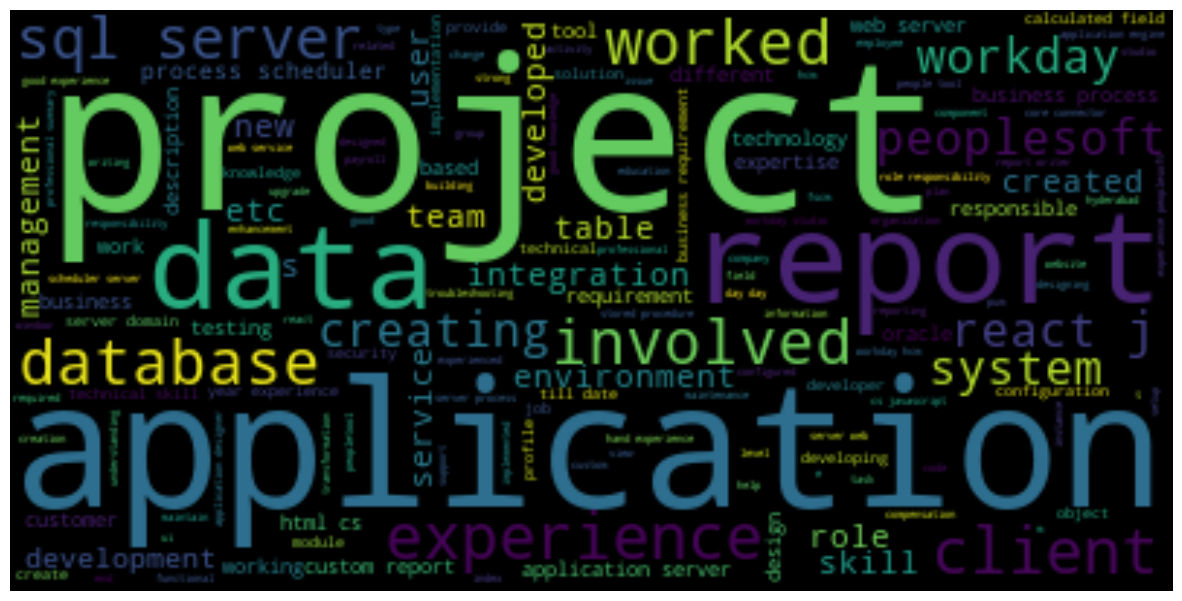

In [54]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = final.Clean_Resume
cleanedSentences = ""
for i in range(len(final.Clean_Resume)):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most Frequent Words

In [55]:
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 311), ('server', 252), ('report', 238), ('application', 237), ('project', 196), ('workday', 194), ('sql', 177), ('integration', 168), ('data', 166), ('business', 156), ('peoplesoft', 156), ('process', 144), ('web', 124), ('system', 120), ('react', 116), ('tool', 111), ('requirement', 106), ('database', 105), ('knowledge', 105), ('client', 101), ('skill', 101), ('involved', 96), ('working', 96), ('j', 96), ('role', 95), ('creating', 94), ('like', 93), ('worked', 92), ('support', 92), ('service', 91), ('user', 91), ('environment', 90), ('development', 88), ('technology', 87), ('developer', 85), ('good', 84), ('technical', 83), ('design', 83), ('team', 79), ('table', 78), ('hcm', 78), ('created', 75), ('responsibility', 72), ('query', 71), ('people', 71), ('work', 71), ('eib', 67), ('year', 66), ('new', 66), ('custom', 66)]


In [56]:
from collections import Counter

In [57]:
import seaborn as sns

In [58]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    plt.barh(range(20), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])],color=["g","b","r","m"])
    plt.yticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]))
    plt.title(title)
    plt.show()

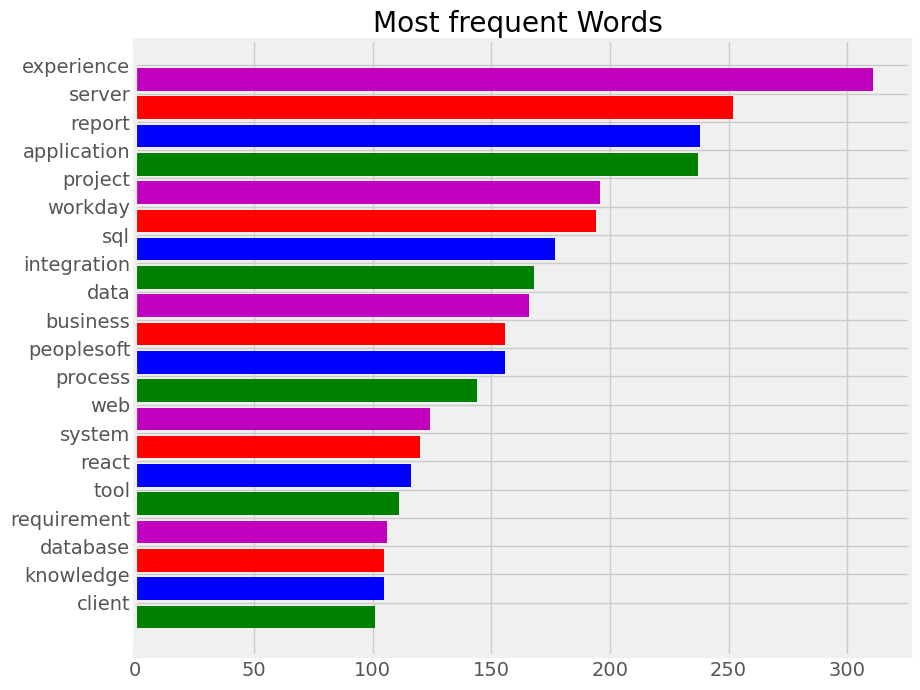

In [59]:
plt.figure(figsize=(10,8))
wordBarGraphFunction(final,"Clean_Resume","Most frequent Words ")

In [60]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

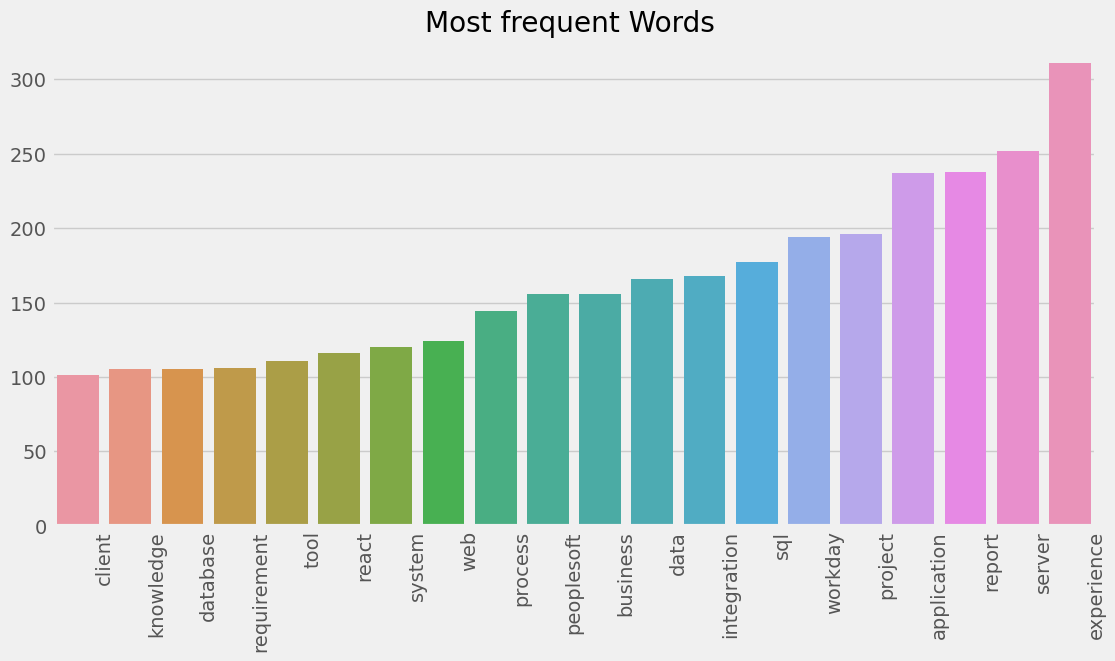

In [61]:
plt.figure(figsize=(12,6))
wordBarGraphFunction_1(final,"Clean_Resume","Most frequent Words ")

## Final DataFrame

In [62]:
resume_data=pd.DataFrame()

In [63]:
resume_data["Resume"]=final["Clean_Resume"]
resume_data["category"]=final["label"]

In [64]:
resume_data

Resume        category
0   anil kumar maddukuri sql msbi developer summar...    SQLDeveloper
1   aradhana tripathi current location gachibowli ...    SQLDeveloper
2   buddha vamsi career objective year experience ...    SQLDeveloper
3   kamballa pradeep synopsis looking forward aspi...    SQLDeveloper
4   resume neeraj mishra having year month experie...    SQLDeveloper
5   sql developer bandi prem sai willing work chal...    SQLDeveloper
6   sql server developer p syam kumar professional...    SQLDeveloper
7   raju pavana kumari professional summary having...    SQLDeveloper
8   resume ramalakshmi k career objective professi...    SQLDeveloper
9   ramesh career objective contribute organizatio...    SQLDeveloper
10  b vinod kumar objective willing work challengi...    SQLDeveloper
11  chinna subbarayudu m dob th march nationality ...  workdayResumes
12  gopi krishna reddy professional summery workin...  workdayResumes
13  g himaja career objective work achieving great...  workdayResumes
14  jyoti verma year experience workday functional...  workdayResumes
15  mooraboyina guravaiah workday integration spec...  workdayResumes
16  venkata saikrishna workday consultant profssio...  workdayResumes
17  rahul techno functional consultant professiona...  workdayResumes
18  ramesh workday hcm consultant professional sum...  workdayResumes
19  seeking suitable position workday hcm techno f...  workdayResumes
20  workday hcm fcm kumar s s role workday consult...  workdayResumes
21  vinay kumar v workday functional consultant ex...  workdayResumes
22  anubhav kumar singh work globally competitive ...      Peoplesoft
23  murali experience summary year experience work...      Peoplesoft
24  profile summary overall year experience people...      Peoplesoft
25  peoplesoft admin varkala vikas career objectiv...      Peoplesoft
26  peoplesoft administration vivekanand sayana ca...      Peoplesoft
27  having year experience peoplesoft application ...      Peoplesoft
28  having year experience peoplesoft application ...      Peoplesoft
29  career objective pursuing peoplesoft executive...      Peoplesoft
30  tanna sujatha objective seeking challenging ro...      Peoplesoft
31  c o n t c t address manyata tech park nagavara...      Peoplesoft
32  kanumuru deepak reddy career objective secure ...  ReactDeveloper
33  haripriya battina experience ui developer reac...  ReactDeveloper
34  kamalakar reddy linked professional summary ye...  ReactDeveloper
35  naveen sadhu title software developer location...  ReactDeveloper
36  pragnya pattnaik expertise having year experie...  ReactDeveloper
37  sri geethika prestige road number bandari layo...  ReactDeveloper
38  thirupathamma balla summary year experience re...  ReactDeveloper
39  ui developer react j developer krishna profess...  ReactDeveloper
40  ui developer react j developer krishna profess...  ReactDeveloper
41  kotani durga prasad objective aspirant positio...  ReactDeveloper
42  venkatalakshmi pedireddy software developer ex...  ReactDeveloper
43  kambala sai surendra mandepeta summary project...  ReactDeveloper
44  mareedu lokesh babu professional overview year...  ReactDeveloper
45  mareedu lokesh babu professional overview year...  ReactDeveloper
46  md khizaruddin rauf experience currently worki...  ReactDeveloper
47  pranish sonone career summary experience year ...  ReactDeveloper
48  ranga gaganam having year successful experienc...  ReactDeveloper
49  shaik abdul sharuk year experience wipro caree...  ReactDeveloper

## Labeling

In [65]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()

In [66]:
resume_data["Encoded_Skill"]=le_encoder.fit_transform(resume_data["category"])

In [67]:
resume_data

Resume        category  \
0   anil kumar maddukuri sql msbi developer summar...    SQLDeveloper   
1   aradhana tripathi current location gachibowli ...    SQLDeveloper   
2   buddha vamsi career objective year experience ...    SQLDeveloper   
3   kamballa pradeep synopsis looking forward aspi...    SQLDeveloper   
4   resume neeraj mishra having year month experie...    SQLDeveloper   
5   sql developer bandi prem sai willing work chal...    SQLDeveloper   
6   sql server developer p syam kumar professional...    SQLDeveloper   
7   raju pavana kumari professional summary having...    SQLDeveloper   
8   resume ramalakshmi k career objective professi...    SQLDeveloper   
9   ramesh career objective contribute organizatio...    SQLDeveloper   
10  b vinod kumar objective willing work challengi...    SQLDeveloper   
11  chinna subbarayudu m dob th march nationality ...  workdayResumes   
12  gopi krishna reddy professional summery workin...  workdayResumes   
13  g himaja career objective work achieving great...  workdayResumes   
14  jyoti verma year experience workday functional...  workdayResumes   
15  mooraboyina guravaiah workday integration spec...  workdayResumes   
16  venkata saikrishna workday consultant profssio...  workdayResumes   
17  rahul techno functional consultant professiona...  workdayResumes   
18  ramesh workday hcm consultant professional sum...  workdayResumes   
19  seeking suitable position workday hcm techno f...  workdayResumes   
20  workday hcm fcm kumar s s role workday consult...  workdayResumes   
21  vinay kumar v workday functional consultant ex...  workdayResumes   
22  anubhav kumar singh work globally competitive ...      Peoplesoft   
23  murali experience summary year experience work...      Peoplesoft   
24  profile summary overall year experience people...      Peoplesoft   
25  peoplesoft admin varkala vikas career objectiv...      Peoplesoft   
26  peoplesoft administration vivekanand sayana ca...      Peoplesoft   
27  having year experience peoplesoft application ...      Peoplesoft   
28  having year experience peoplesoft application ...      Peoplesoft   
29  career objective pursuing peoplesoft executive...      Peoplesoft   
30  tanna sujatha objective seeking challenging ro...      Peoplesoft   
31  c o n t c t address manyata tech park nagavara...      Peoplesoft   
32  kanumuru deepak reddy career objective secure ...  ReactDeveloper   
33  haripriya battina experience ui developer reac...  ReactDeveloper   
34  kamalakar reddy linked professional summary ye...  ReactDeveloper   
35  naveen sadhu title software developer location...  ReactDeveloper   
36  pragnya pattnaik expertise having year experie...  ReactDeveloper   
37  sri geethika prestige road number bandari layo...  ReactDeveloper   
38  thirupathamma balla summary year experience re...  ReactDeveloper   
39  ui developer react j developer krishna profess...  ReactDeveloper   
40  ui developer react j developer krishna profess...  ReactDeveloper   
41  kotani durga prasad objective aspirant positio...  ReactDeveloper   
42  venkatalakshmi pedireddy software developer ex...  ReactDeveloper   
43  kambala sai surendra mandepeta summary project...  ReactDeveloper   
44  mareedu lokesh babu professional overview year...  ReactDeveloper   
45  mareedu lokesh babu professional overview year...  ReactDeveloper   
46  md khizaruddin rauf experience currently worki...  ReactDeveloper   
47  pranish sonone career summary experience year ...  ReactDeveloper   
48  ranga gaganam having year successful experienc...  ReactDeveloper   
49  shaik abdul sharuk year experience wipro caree...  ReactDeveloper   

    Encoded_Skill  
0               2  
1               2  
2               2  
3               2  
4               2  
5               2  
6               2  
7               2  
8               2  
9               2  
10              2  
11              3  
12              3  
13              3  
14              3  
15 

In [68]:
# saving the dataframe
#resume_data.to_csv('resume.csv')

In [69]:
resume_data.isna().sum()

Resume           0
category         0
Encoded_Skill    0
dtype: int64

In [70]:
resume_data.describe()

Encoded_Skill
count      50.000000
mean        1.460000
std         1.053856
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000

In [71]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Resume         50 non-null     object
 1   category       50 non-null     object
 2   Encoded_Skill  50 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 1.1+ KB


## Vectorization

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
requiredText = resume_data["Resume"].values
requiredTarget = resume_data["Encoded_Skill"].values

## TF-IDF

In [74]:
word_vectorizer = TfidfVectorizer(smooth_idf=True,analyzer='word',ngram_range=(1,3),
    sublinear_tf=True,
    stop_words='english',
    max_features=5000)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,stratify=requiredTarget,shuffle = True,random_state=20, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(35, 5000)
(15, 5000)


In [75]:
X_train.shape,y_train.shape

((35, 5000), (35,))

In [76]:
print("X_train:\n",X_train)
print("---------------------------------------------")
print("X_test:\n",X_test)

X_train:
   (0, 4979)	0.03971217907546842
  (0, 4974)	0.01486992848035217
  (0, 4973)	0.010988095660977519
  (0, 4816)	0.015188723577243442
  (0, 4735)	0.03971217907546842
  (0, 4734)	0.03971217907546842
  (0, 4729)	0.01456065109030766
  (0, 4708)	0.03971217907546842
  (0, 4707)	0.03673178613811162
  (0, 4706)	0.0325311582218457
  (0, 4635)	0.03971217907546842
  (0, 4601)	0.07435084534852807
  (0, 4600)	0.07435084534852807
  (0, 4591)	0.04984861628963929
  (0, 4561)	0.03971217907546842
  (0, 4560)	0.029550765284488894
  (0, 4515)	0.06201559916557538
  (0, 4514)	0.06201559916557538
  (0, 4505)	0.025962948315846692
  (0, 4504)	0.07435084534852807
  (0, 4503)	0.07435084534852807
  (0, 4502)	0.1047888837053218
  (0, 4501)	0.1047888837053218
  (0, 4443)	0.034420013775358436
  (0, 4437)	0.019552504836652367
  :	:
  (34, 168)	0.06817781553969794
  (34, 167)	0.06817781553969794
  (34, 166)	0.05310771323969606
  (34, 148)	0.06817781553969794
  (34, 147)	0.06817781553969794
  (34, 146)	0.0590922

## Model Building

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly as py
from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Support Vector Machine

In [78]:
svm = OneVsRestClassifier(SVC(C=1.0,kernel='linear',degree=3,gamma='scale',class_weight ='balanced'))
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
svm_score = svm.score(X_test, y_test)
print("SVM Classification Train Accuracy: {}%".format(round(svm.score(X_train,y_train)*100,2)))
print("SVM Classification Test Accuracy: {}%".format(round(svm.score(X_test,y_test)*100,2)))
svm_cm = confusion_matrix(y_test, svm_prediction)

print("Classification Report:\n")

print(classification_report(y_test, svm_prediction))

SVM Classification Train Accuracy: 100.0%
SVM Classification Test Accuracy: 100.0%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



### Naive Bayes Classifier

In [79]:
clf =MultinomialNB(alpha=1, fit_prior=False, class_prior=None).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
nb_score = clf.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, prediction)

Accuracy of MultinomialNB Classifier on training set: 1.00
Accuracy of MultinomialNB Classifier on test set: 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15




## Decision Tree Classifier

In [80]:
dt = DecisionTreeClassifier(criterion='entropy',class_weight = "balanced",splitter='best',max_depth=None)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classification Train Accuracy: {}%".format(round(dt.score(X_train,y_train)*100,2)))
print("Decision Tree Classification Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))
dt_cm = confusion_matrix(y_test, dt_prediction)

print("Classification Report:\n")

print(classification_report(y_test, dt_prediction))

Decision Tree Classification Train Accuracy: 100.0%
Decision Tree Classification Test Accuracy: 100.0%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



## KNeighbors Classifier

In [81]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3, weights='uniform',p=2,metric='minkowski',algorithm='brute'))
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print("KNN Classification Train Accuracy: {}%".format(round(knn.score(X_train,y_train)*100,2)))
print("KNN Classification Test Accuracy: {}%".format(round(knn.score(X_test,y_test)*100,2)))
knn_cm = confusion_matrix(y_test, knn_prediction)

print('Classification Report:\n')

print(classification_report(y_test, knn_prediction))
vis = (classification_report(y_test, knn_prediction))

KNN Classification Train Accuracy: 100.0%
KNN Classification Test Accuracy: 100.0%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



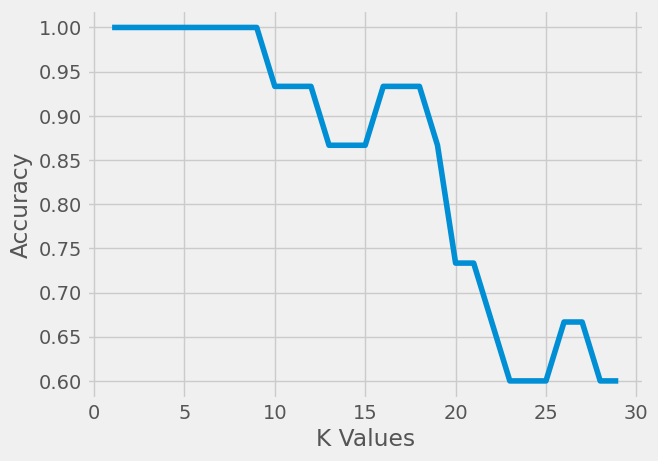

In [82]:
#Find Best K Value

score_list = []
for each in range(1,30):
    knn2 =OneVsRestClassifier(KNeighborsClassifier(n_neighbors=each, weights='uniform',p=2,metric='minkowski',algorithm='brute'))
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test, y_test))
plt.plot(range(1,30), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

## Random Forest Classifier

In [83]:
rf =RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3,max_features='auto',random_state=None,
 class_weight="balanced")
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classification Train Accuracy: {}%".format(round(rf.score(X_train,y_train)*100,2)))
print("Random Forest Classification Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
rf_cm = confusion_matrix(y_test, rf_prediction)
print("Classification Report:\n")
print(classification_report(y_test, rf_prediction))

Random Forest Classification Train Accuracy: 100.0%
Random Forest Classification Test Accuracy: 93.33%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           0.93        15
   macro avg       0.96      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



### Hyper Parameter Tweaking:
### Grid_Search CV

In [84]:
from sklearn.model_selection import GridSearchCV

grid_search_ = GridSearchCV(estimator =rf,param_grid = {'criterion':['entropy','gini'],
                                                                'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                              cv=5)
grid_search_.fit(X_train,y_train)
print(grid_search_.best_params_)
print(grid_search_.best_score_)

{'criterion': 'entropy', 'max_depth': 6}
0.9714285714285715


In [85]:
train_accuracy_1=[]
test_accuracy_1=[]
for depth in range(1,10):
    model_2=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=depth,max_features='auto',random_state=None,
 class_weight="balanced")
    model_2.fit(X_train,y_train)
    train_accuracy_1.append(model_2.score(X_train,y_train))
    test_accuracy_1.append(model_2.score(X_test,y_test))

Text(0, 0.5, 'performance')

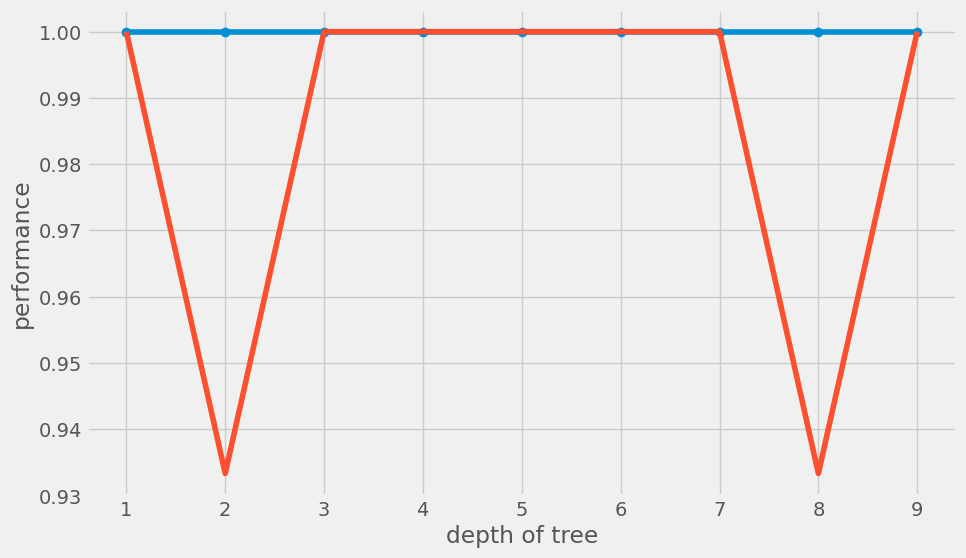

In [86]:
frame_1=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy_1,'test_acc':test_accuracy_1})
plt.figure(figsize=(10,6))
plt.plot(frame_1["max_depth"],frame_1["train_acc"],marker='o')
plt.plot(frame_1["max_depth"],frame_1["test_acc"])
plt.xlabel("depth of tree")
plt.ylabel("performance")

## AdaBoost Classifier

In [87]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
ab_score= ab_clf.score(X_test, y_test)
ab_prediction = ab_clf.predict(X_test)
print("AdaBoost Classifier Train Accuracy: {}%".format(round(ab_clf.score(X_train,y_train)*100,2)))
print("AdaBoost Classifier Test Accuracy: {}%".format(round(ab_clf.score(X_test,y_test)*100,2)))      
ab_cm = confusion_matrix(y_test, ab_prediction)
print("Classification Report:\n")
print(classification_report(y_test, ab_prediction))

AdaBoost Classifier Train Accuracy: 100.0%
AdaBoost Classifier Test Accuracy: 93.33%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           0.93        15
   macro avg       0.96      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



## Gradient Boosting Classifier

In [88]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_score=gb_clf.score(X_test, y_test)
gb_prediction = gb_clf.predict(X_test)
print("Gradient Boosting Classifier Train Accuracy: {}%".format(round(gb_clf.score(X_train,y_train)*100,2)))
print("Gradient Boosting Classifier Test Accuracy: {}%".format(round(gb_clf.score(X_test,y_test)*100,2)))      
gb_cm = confusion_matrix(y_test, gb_prediction)
print("Classification Report:\n")
print(classification_report(y_test, gb_prediction))

Gradient Boosting Classifier Train Accuracy: 100.0%
Gradient Boosting Classifier Test Accuracy: 93.33%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           0.93        15
   macro avg       0.96      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



In [89]:
!pip install lightgbm

## Xtreme Gradient Boosting Classifier

In [90]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_score=xgb_clf.score(X_test, y_test)
xgb_prediction = xgb_clf.predict(X_test)
print("Xtreme Gradient Boosting Classifier Train Accuracy: {}%".format(round(xgb_clf.score(X_train,y_train)*100,2)))
print("Xtreme Gradient Boosting Classifier Test Accuracy: {}%".format(round(xgb_clf.score(X_test,y_test)*100,2)))      
xgb_cm = confusion_matrix(y_test, xgb_prediction)
print("Classification Report:\n")
print(classification_report(y_test, xgb_prediction))

Xtreme Gradient Boosting Classifier Train Accuracy: 100.0%
Xtreme Gradient Boosting Classifier Test Accuracy: 93.33%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3

    accuracy                           0.93        15
   macro avg       0.96      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



## Light Gradient Boosting Classifier

In [91]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
lgb_score=lgb_clf.score(X_test, y_test)
lgb_prediction = lgb_clf.predict(X_test)
print("Light Gradient Boosting Classifier Train Accuracy: {}%".format(round(lgb_clf.score(X_train,y_train)*100,2)))
print("Light Gradient Boosting Classifier Test Accuracy: {}%".format(round(lgb_clf.score(X_test,y_test)*100,2)))      
lgb_cm = confusion_matrix(y_test, lgb_prediction)
print("Classification Report:\n")
print(classification_report(y_test, lgb_prediction))

Light Gradient Boosting Classifier Train Accuracy: 34.29%
Light Gradient Boosting Classifier Test Accuracy: 40.0%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      1.00      0.57         6
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         3

    accuracy                           0.40        15
   macro avg       0.10      0.25      0.14        15
weighted avg       0.16      0.40      0.23        15



In [92]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [93]:
TN = [knn_cm[0,0], svm_cm[0,0], nb_cm[0,0], dt_cm[0,0], rf_cm[0,0], ab_cm[0,0], gb_cm[0,0], xgb_cm[0,0], lgb_cm[0,0]]
FP = [knn_cm[0,1], svm_cm[0,1], nb_cm[0,1], dt_cm[0,1], rf_cm[0,1], ab_cm[0,1], gb_cm[0,1], xgb_cm[0,1], lgb_cm[0,1]]
FN = [knn_cm[1,0], svm_cm[1,0], nb_cm[1,0], dt_cm[1,0], rf_cm[1,0], ab_cm[1,0], gb_cm[1,0], xgb_cm[1,0], lgb_cm[1,0]]
TP = [knn_cm[1,1], svm_cm[1,1], nb_cm[1,1], dt_cm[1,1], rf_cm[1,1], ab_cm[1,1], gb_cm[1,1], xgb_cm[1,1], lgb_cm[1,1]]
Accuracy = [knn_score, svm_score, nb_score, dt_score, rf_score, ab_score, gb_score, xgb_score, lgb_score]
Classification = ["KNN Classification", "SVM Classification", "Naive Bayes Classification", 
                  "Decision Tree Classification", "Random Forest Classification","AdaBoost Classifier","GradientBoosting Classifier",
                   "Xtreme Gradient Boosting Classifier", "Light Gradient Boosting Classifier"]
list_matrix = [Classification, TN, FP, FN, TP, Accuracy]
list_headers = ["Model", "TN", "FP", "FN", "TP", "Accuracy"]
zipped = list(zip(list_headers, list_matrix))
data_dict = dict(zipped)
df_1=pd.DataFrame(data_dict)

In [94]:
df_1

Model  TN  FP  FN  TP  Accuracy
0                   KNN Classification   3   0   0   6  1.000000
1                   SVM Classification   3   0   0   6  1.000000
2           Naive Bayes Classification   3   0   0   6  1.000000
3         Decision Tree Classification   3   0   0   6  1.000000
4         Random Forest Classification   2   1   0   6  0.933333
5                  AdaBoost Classifier   2   1   0   6  0.933333
6          GradientBoosting Classifier   2   1   0   6  0.933333
7  Xtreme Gradient Boosting Classifier   2   1   0   6  0.933333
8   Light Gradient Boosting Classifier   0   3   0   6  0.400000

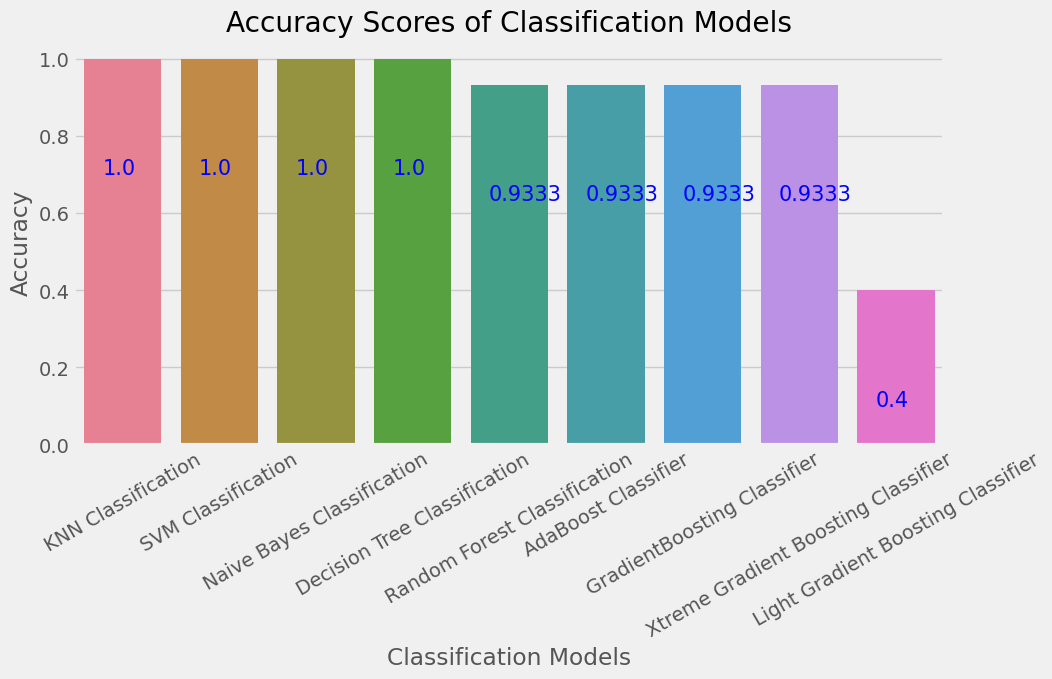

In [95]:
#Accuracy
plt.figure(figsize=(10,5))
ax= sns.barplot(x=df_1.Model, y=df_1.Accuracy, palette =sns.color_palette("husl", 9) )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.style.use('seaborn-dark-palette')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()
#sns.cubehelix_palette(len(df_1.Model)

import pickle
with open('resume_classification.pickle','wb') as f:
    pickle.dump(knn,f)

import pickle
with open('model_tf.pickle','wb') as f:
    pickle.dump(word_vectorizer,f)